# Supervised learning: simple models

### Outline <a name = 'outline'></a>
* [Data generation](#datasets) 
    * [Make datasets](#makedata)
    * [Load toy dadasets](#loaddata)
    * [Fetch real world datasets](#fetchdata)
    * [Generate fake datasets](#fakedata)
    * [Read data from files](#readdata)
* [Decision stump & decision trees](#trees)
* [Distance-based models](#knn)
* [Naive Baiyes model](#baiyes)

In [1]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')

import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus 

from faker import Faker
from IPython.display import Image
from sklearn import datasets, metrics, model_selection, naive_bayes, neighbors, tree

In [2]:
%matplotlib inline

## Data generation<a name = 'datasets'> </a>

### Sklearn datasets
documentation: http://scikit-learn.org/stable/datasets/

[**Functions for generation of classsification or regression problem**](#makedata)
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

In [3]:
circles = datasets.make_circles()

In [4]:
type(circles)

tuple

In [5]:
print(f'target: {circles[1][:10]}')
print(f'features: {circles[0][:10]}')

target: [0 1 1 1 0 1 1 0 1 1]
features: [[ 0.63742399 -0.77051324]
 [-0.77486653 -0.19895191]
 [ 0.8         0.        ]
 [-0.79369176  0.10026659]
 [-0.30901699 -0.95105652]
 [-0.50993919  0.61641059]
 [-0.42866144 -0.67546234]
 [ 0.42577929 -0.90482705]
 [ 0.34062343 -0.72386164]
 [ 0.14990505 -0.7858298 ]]


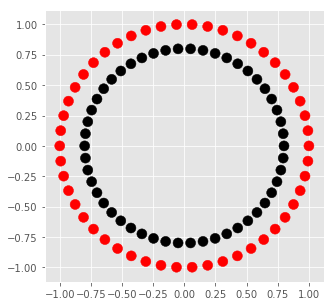

In [6]:
data_tuple = circles

plt.figure(figsize = (5, 5))

plt.scatter(list(map(lambda x: x[0], data_tuple[0])), 
            list(map(lambda x: x[1], data_tuple[0])), 
            c = data_tuple[1], 
            cmap = matplotlib.colors.ListedColormap(['red', 'black']),
           s = 100)

plt.show()

In [7]:
noisy_circles = datasets.make_circles(noise = 0.1)

In [8]:
def plot_2d_dataset(data_tuple:tuple, size:tuple = (5,5), 
                    colors:list = ['red', 'black']):
    """Function to generate 2d plot for plain datasets"""
    
    #set size
    plt.figure(figsize = (5, 5))
    
    #build figure
    plt.scatter(list(map(lambda x: x[0], data_tuple[0])), 
                list(map(lambda x: x[1], data_tuple[0])), 
                c = data_tuple[1], 
                cmap = matplotlib.colors.ListedColormap(colors))
    
    #show figure
    plt.show()

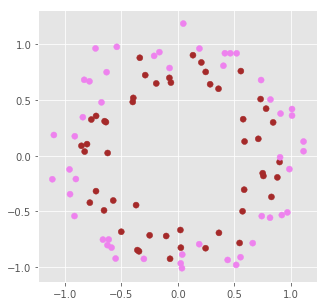

In [9]:
plot_2d_dataset(noisy_circles, colors = ['violet', 'brown'])

[back to outline](#outline)

[**Functions for toy datasets loading **](#loaddata)
* load_iris
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

**Iris Plants Data Set**

In [10]:
iris = datasets.load_iris()

In [11]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [12]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [13]:
print(f'target names: {iris.target_names}\n')
print(f'feature names: {iris.feature_names}')

target names: ['setosa' 'versicolor' 'virginica']

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [15]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Handwritten Digits Data Set**

In [16]:
digits = datasets.load_digits()

In [17]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [18]:
print(f'example of target: {digits.target[0]}')
print(f'example of features: {digits.data[0]}')

example of target: 0
example of features: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


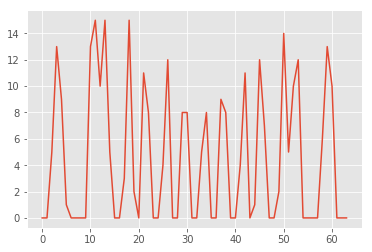

In [19]:
plt.plot(digits.data[0])
plt.show()

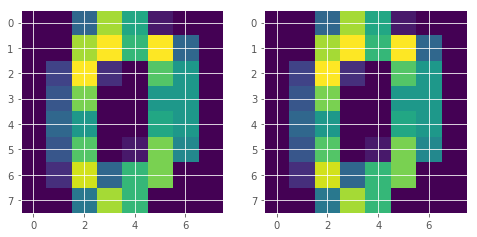

In [20]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.imshow(digits.data[0].reshape(8,8))

plt.subplot(1, 2, 2)
plt.imshow(digits.images[0])

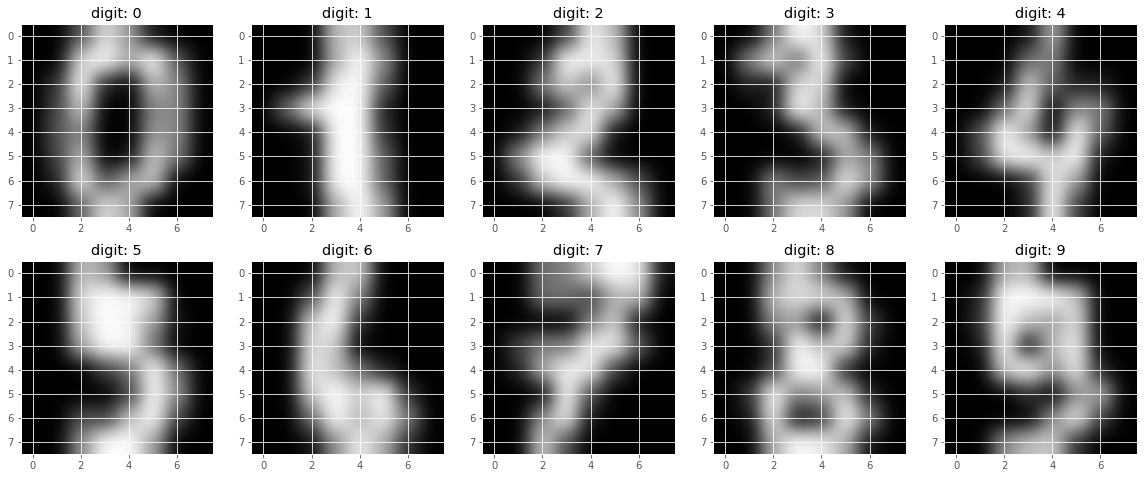

In [21]:
plt.figure(figsize = (20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'gray', interpolation = 'gaussian')
    plt.title('digit: ' + str(digits.target[plot_number]))

[back to outline](#outline)

[**Functions for larger real world datasets loading **](#fetchdata)
* fetch_mldata
* fetch_kddcup99
* fetch_20newsgroups
* fetch_california_housing
* fetch_lfw_people
* etc

In [22]:
news_groups = datasets.fetch_20newsgroups(subset = 'test', random_state = 0)

In [23]:
news_groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [24]:
print(f'Target names: {news_groups.target_names}')

Target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [25]:
print(f'example of target: {news_groups.target_names[news_groups.target[0]]}')
print(f'example of data piece: {news_groups.data[0]}')

example of target: rec.autos
example of data piece: From: mliggett@silver.ucs.indiana.edu (matthew liggett)
Subject: Re: V4 V6 V8 V12 Vx?
Nntp-Posting-Host: silver.ucs.indiana.edu
Organization: Indiana University
Lines: 32

In <1993Apr23.132214.6755@cs.tulane.edu> finnegan@nrlssc.navy.mil writes:

>In article <Apr22.202724.24131@engr.washington.edu>
>eliot@stalfos.engr.washington.edu (eliot) writes:
>>
>>the subarus all use 180 degree vees in their engines..  :-)
>>
>>
>>eliot

>Wouldn't that make them an I4?  Or would they 
>really be an _4 (henceforth referred to as
>"underscore 4")?

horizontally opposed 4.
or 'boxer'
great idea, actually..
smooth running; low center of gravity..
also used in some honda gullwings, corvairs, porsches (others?)
...

>Kenneth
>finnegan@nrlssc.navy.mil




-- 
/-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-\
| |\/|  __   -=> mliggett@silver.ucs.indiana.edu <=- (mliggett@iugold.bitnet  |
* |  |/\||   'junk' collector, toys 

[back to outline](#outline)

[**Fake data generation**](#fakedata)

In [26]:
fake_generator = Faker()

In [27]:
fake_generator.pydict(nb_elements = 10)

{'contain': 'jasminlarson@hotmail.com',
 'voice': Decimal('-76.888'),
 'energy': 'dFiWsJtqFgcJOYKsGRiN',
 'once': 116,
 'significant': 'zsolis@hotmail.com',
 'mouth': 'XCHnAcQejRhTDspXeTKQ',
 'military': 'geqfsvlUTaENBrmwxkNV',
 'heavy': 'tuWxPDgpQSIvuAhmPfMc',
 'move': 'utvgCICganGEHFuZAzZU',
 'authority': -167429360286428.0}

In [28]:
fake_generator.pylist(nb_elements = 3)

[3628, -9929856.243, 'http://hunter.info/main/tags/main/privacy/']

In [29]:
fake_generator.pystr()

'kEJbZrRyIbAWDWGkohjO'

In [30]:
#fake dataset with user data
pd.DataFrame([fake_generator.simple_profile() for profile_num in range(10)])

username                name sex  \
0        troyjones      Stanley Henson   M   
1        dwilliams         Lauren Reed   F   
2     knoxmargaret     Cheryl Williams   F   
3        jeffrey83       Leslie Rogers   F   
4     perezdesiree        Emily Hunter   F   
5    marshallkaren       Michael Jones   M   
6    clintonpierce         Andrea Clay   F   
7          mturner  Christina Robinson   F   
8  dustinblackwell           Ana Moore   F   
9     lindsaysmith      Kenneth Larsen   M   

                                             address  \
0           075 Stacy Spur\nLake Brianview, CA 88154   
1    576 Corey Station\nSouth Michelleside, AL 49689   
2    59523 Reyes Dale Apt. 416\nJosephview, NH 16912   
3     61038 Angel Camp\nPort Christinefurt, NC 43036   
4      9016 Elizabeth Parkway\nMichaelberg, RI 32599   
5  10136 Samantha Valleys Apt. 609\nEast Susan, G...   
6            248 April Ports\nKaitlynburgh, TX 19153   
7  952 Hughes Mountain Apt. 036\nJeffreyville, SD...   
8       44419 Jennifer Lane\nNorth Joefurt, FL 49339   
9            6749 Tyler Villages\nLunabury, OK 93486   

                        mail   birthdate  
0       jeremy08@hotmail.com  2017-04-12  
1     donnahiggins@gmail.com  1992-09-14  
2       lisamiller@yahoo.com  1961-01-30  
3   robertsonjason@yahoo.com  2017-05-10  
4     fernandopaul@yahoo.com  1988-06-23  
5  jenniferballard@gmail.com  1981-07-21  
6       michelle53@gmail.com  1949-02-06  
7       kdavenport@yahoo.com  1957-10-15  
8          hking@hotmail.com  1961-02-18  
9   levineedward@hotmail.com  1956-12-07

In [31]:
print(f'Female name: {fake_generator.name_female()}')
print(f'Male name: {fake_generator.name_male()}')
print(f'Company: {fake_generator.bs()}')
print(f'Country: {fake_generator.country()}')
print(f'City: {fake_generator.city()}')
print(f'Email: {fake_generator.company_email()}')
print(f'Android platform token: {fake_generator.android_platform_token()}')
print(f'Geo coordinates: {fake_generator.latlng()}')

Female name: Morgan Roberson
Male name: Michael Cruz
Company: productize out-of-the-box deliverables
Country: Spain
City: Jamesbury
Email: richardsonkristie@curry-daniels.com
Android platform token: Android 4.1
Geo coordinates: (Decimal('-77.0558575'), Decimal('-66.150001'))


In [32]:
ru_fake_generator = Faker(['ru_Ru'])

In [33]:
print(f'Female name: {ru_fake_generator.name_female()}')
print(f'Male name: {ru_fake_generator.name_male()}')
print(f'Company: {ru_fake_generator.bs()}')
print(f'Country: {ru_fake_generator.country()}')
print(f'City: {ru_fake_generator.city()}')
print(f'Email: {ru_fake_generator.company_email()}')
print(f'Android platform token: {ru_fake_generator.android_platform_token()}')
print(f'Geo coordinates: {ru_fake_generator.latlng()}')

Female name: Суворова Регина Дмитриевна
Male name: Карпов Платон Фадеевич
Company: Интеграция кроссплатформенных схем
Country: Марокко
City: д. Новочеркасск
Email: ipati1978@kotova.info
Android platform token: Android 4.4
Geo coordinates: (Decimal('47.9079655'), Decimal('32.421820'))


In [57]:
#fake dataset with user data
pd.DataFrame([ru_fake_generator.simple_profile() for profile_num in range(10)])

username                               name sex  \
0          frolsisoev      Большакова Светлана Рубеновна   F   
1  sorokinmaksimiljan  Анастасия Константиновна Сафонова   F   
2           arkadi_88       Гордеева Светлана Руслановна   F   
3             natan07         Захаров Онуфрий Богданович   M   
4     lebedevboleslav          Данилов Радован Давыдович   M   
5            garhipov      Марина Александровна Смирнова   F   
6       adamtretjakov         Большаков Софрон Фёдорович   M   
7            ipat1989             Антип Валерьевич Ильин   M   
8    kotovaanastasija          Оксана Леонидовна Крюкова   F   
9       andremedvedev       Никитин Варфоломей Виленович   M   

                                             address  \
0  п. Петропавловск-Камчатский, наб. Макаренко, д...   
1  ст. Середниково, алл. Привольная, д. 590 к. 97...   
2     ст. Лагань, пр. Новый, д. 1/3 стр. 707, 064242   
3         г. Курск, ш. Семашко, д. 7 стр. 65, 530261   
4  к. Воскресенск, ш. Строителей, д. 26 к. 616, 2...   
5  г. Верхотурье, ул. Полтавская, д. 6/6 стр. 9/6...   
6        с. Плес, пр. Ленский, д. 5 стр. 5/4, 445697   
7    ст. Бузулук, пр. Средний, д. 8 стр. 8/3, 818947   
8  г. Балтийск, пер. Дорожников, д. 23 стр. 7/5, ...   
9         г. Щельяюр, пер. Казанский, д. 109, 831817   

                         mail   birthdate  
0    ershovaglafira@yandex.ru  2000-08-18  
1     valentin1971@rambler.ru  1980-04-14  
2    apollonkorolev@yahoo.com  1914-06-24  
3  efremovnikanor@hotmail.com  1971-11-11  
4        gleb1972@hotmail.com  1959-04-02  
5        varvara_67@gmail.com  1946-10-07  
6     potapovevgraf@yahoo.com  1929-01-06  
7      apollon_1981@yahoo.com  1992-06-03  
8   samsonovcheslav@gmail.com  1911-01-09  
9         skiseleva@yandex.ru  1920-01-04

[back to outline](#outline)

[**Reading data from local files**](#readdata)

In [34]:
bikes = pd.read_csv('bikes_demand_prediction.csv', header =  0, sep = ',')

In [35]:
bikes

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [36]:
bikes.loc[5:15, ['datetime', 'count']]

datetime  count
5   2011-01-01 05:00:00      1
6   2011-01-01 06:00:00      2
7   2011-01-01 07:00:00      3
8   2011-01-01 08:00:00      8
9   2011-01-01 09:00:00     14
10  2011-01-01 10:00:00     36
11  2011-01-01 11:00:00     56
12  2011-01-01 12:00:00     84
13  2011-01-01 13:00:00     94
14  2011-01-01 14:00:00    106
15  2011-01-01 15:00:00    110

In [37]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [38]:
bikes.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

[back to outline](#outline)

## Decision stump & decision trees <a name = 'trees'></a>

In [39]:
#data generation
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant = 0, 
                                                      n_clusters_per_class = 1, 
                                                      random_state = 0)

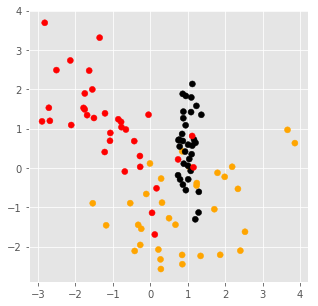

In [40]:
plot_2d_dataset(classification_problem, colors = ['red', 'black', 'orange'])

In [41]:
#data train/test split
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1],
    test_size = 0.3,
    random_state = 0)

In [42]:
#model training
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [43]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.6666666666666666

In [44]:
#helper functions for separating surface visualization

colors = matplotlib.colors.ListedColormap(['red', 'black', 'orange'])
light_colors = matplotlib.colors.ListedColormap(['lightcoral', 'silver', 'bisque'])

def get_meshgrid(data, step = .05, border = .5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(
        estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    
    plt.pcolormesh(xx, 
                      yy, 
                      mesh_predictions, 
                      cmap = light_colors)
    
    plt.scatter(train_data[:, 0], 
                   train_data[:, 1], 
                   c = train_labels, 
                   s = 100, 
                   cmap = colors)
    
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(
        train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    #xx, yy = get_meshgrid(test_data)
    #mesh_predictions = np.array(
    #    estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, 
                   yy, 
                   mesh_predictions, 
                   cmap = light_colors)
    
    plt.scatter(test_data[:, 0], 
                test_data[:, 1], 
                c = test_labels, 
                s = 100, 
                cmap = colors)
    
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(
        test_labels, estimator.predict(test_data))))

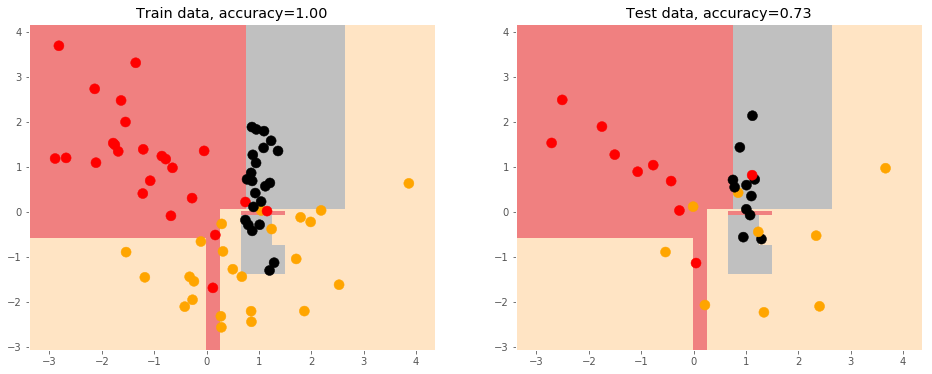

In [45]:
estimator = tree.DecisionTreeClassifier(random_state = 0)#, max_depth = 2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [46]:
dot_data = tree.export_graphviz(estimator, out_file="graphviz/small_tree.out", 
                         feature_names=['x', 'y'],  
                         class_names=['red', 'black', 'orange'],  
                         filled=True, rounded=True,  
                         special_characters=True)

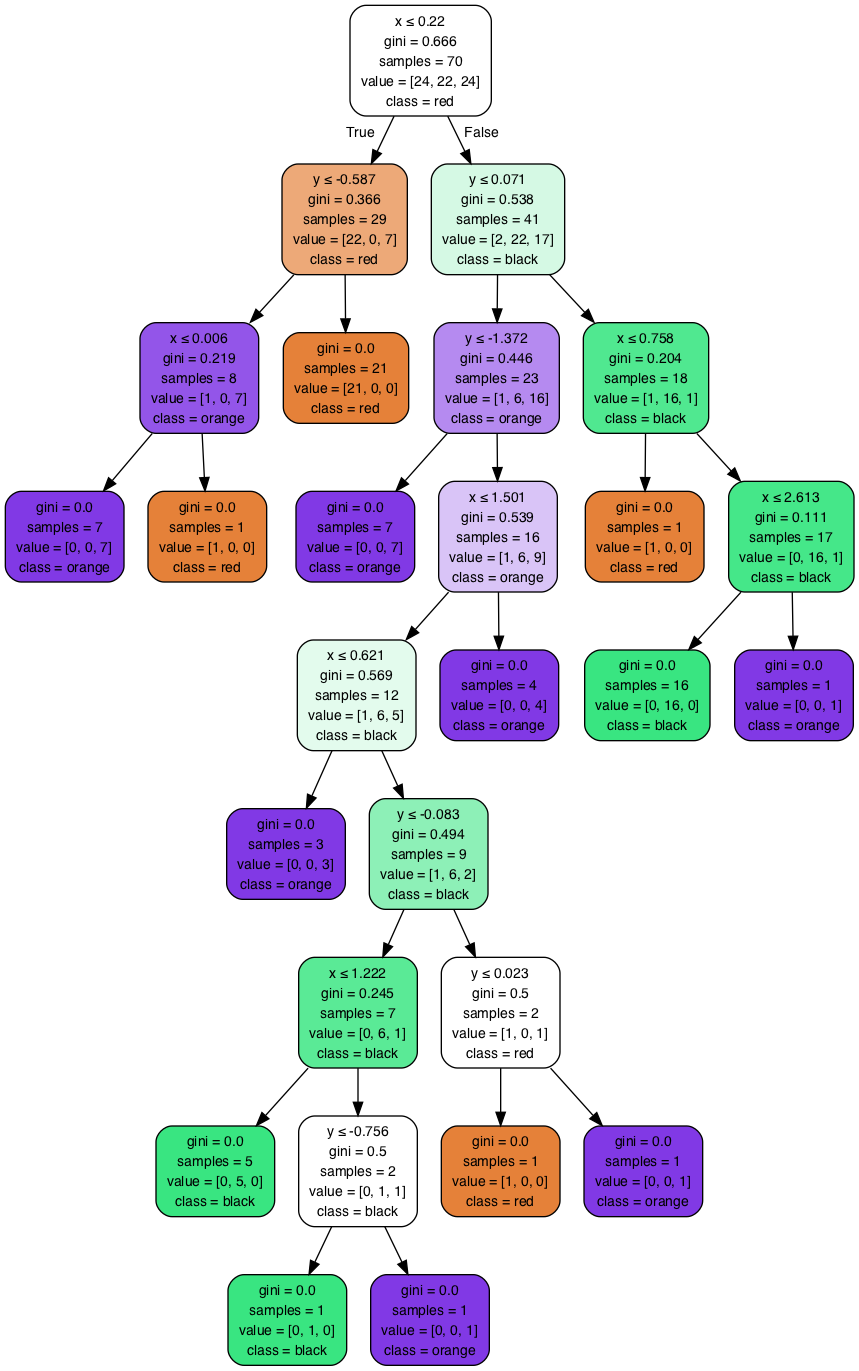

In [47]:
graph = pydotplus.graphviz.graph_from_dot_file("graphviz/small_tree.out")  
Image(graph.create_png())

[back to outline](#outline)

## Distance-based models <a name = 'knn'></a>

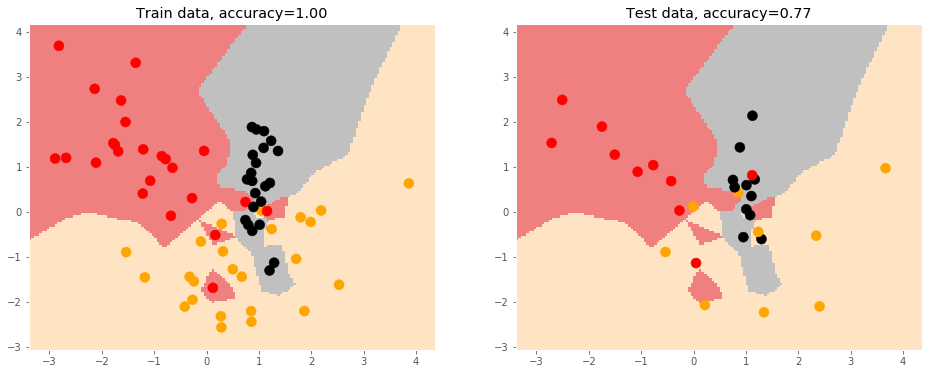

In [48]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

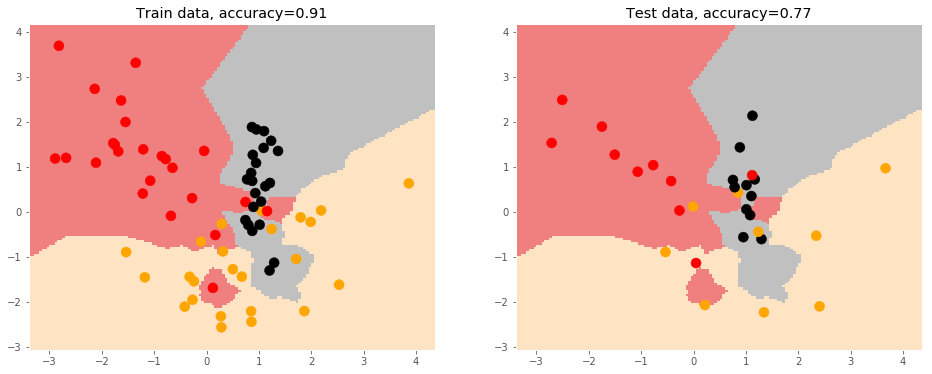

In [49]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

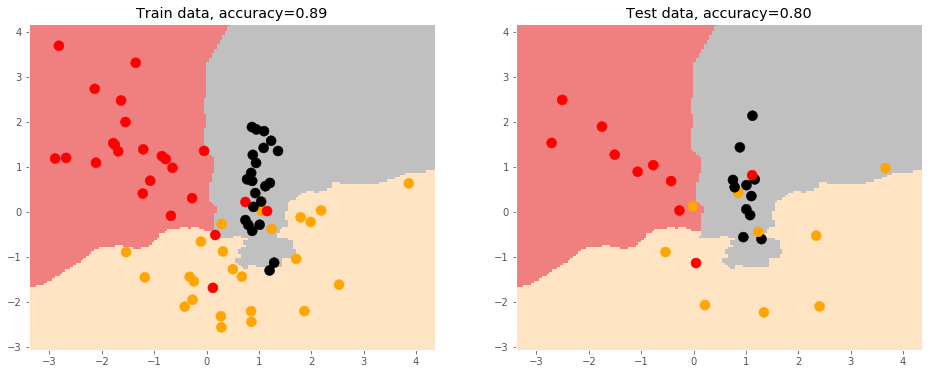

In [50]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

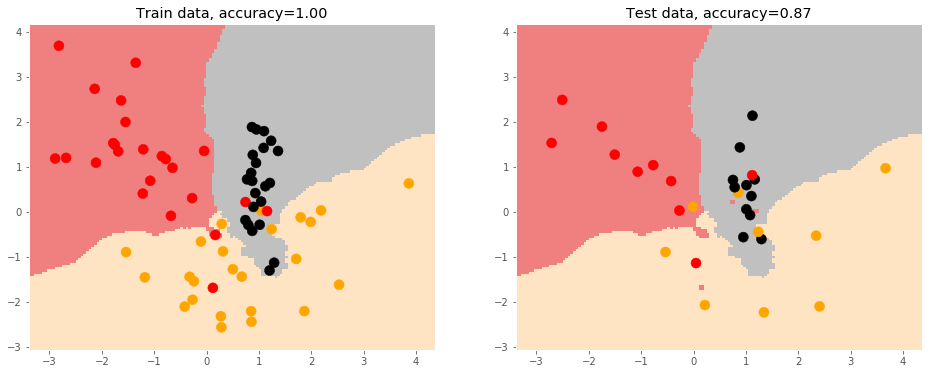

In [51]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

[back to outline](#outline)

## Naive Baiyes model <a name = 'baiyes'></a>

In [52]:
estimator = naive_bayes.GaussianNB()
estimator.fit(train_data, train_labels)

GaussianNB(priors=None)

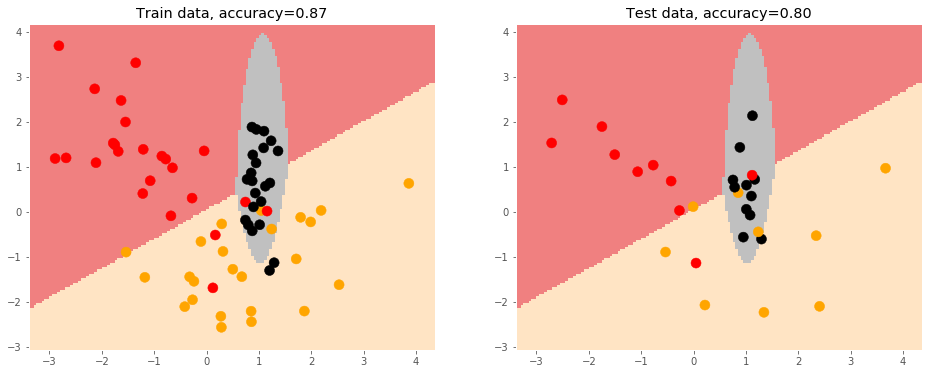

In [53]:
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [54]:
estimator.theta_

array([[-1.12548408,  1.14728805],
       [ 1.00154542,  0.58396415],
       [ 0.7580685 , -1.18192183]])

In [55]:
estimator.sigma_

array([[1.10302786, 1.3564884 ],
       [0.02990074, 0.81074094],
       [1.46716917, 0.79664852]])

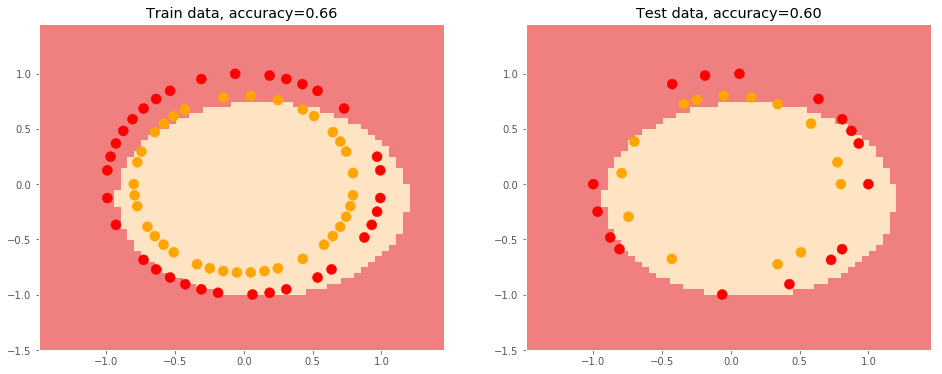

In [56]:
estimator = naive_bayes.GaussianNB()#priors = [0.5, 0.5])

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    circles[0], 
    circles[1],
    test_size = 0.3,
    random_state = 0)  

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

[back to outline](#outline)

## Takeaways
* There are many different ways to generate data. In the absence of a suitable dataset, it can be generated independently using the suitable tool.
* Most supervised learning algorithms are based on simple mathematical principles and basic logic. Easy to learn on your own =)
* Each algorithm has its own area of application, its advantages and disadvantages. Simple algorithms have a very limited scope. It is important to understand for what task you are using the selected approaches.
* Assessing an applicability of an algorithm for a specific task is not limited to assessing the accuracy or error of the model. It is important to investigate the properties of the resulting model as well.